In [1]:
import pandas as pd
import numpy as np
import requests

import io
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

res = requests.get(url).content

auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

auto.columns =['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',' body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [2]:
auto2=auto.replace('?',np.nan).dropna()
auto2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
auto2['price']=pd.to_numeric(auto2['price'])

In [4]:
#moku price setumei length engine-size train_test_split random_state0
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y=auto2[['price']]
x=auto2[['length','engine-size']]
x1=auto2['length']
x2=auto2['engine-size']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [5]:
model=LinearRegression()
model.fit(x_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
model.score(x_test,y_test)

0.7460477382289898

In [7]:
model.coef_

array([[133.96073835, 130.05227025]])

In [8]:
model.intercept_

array([-27270.3059874])

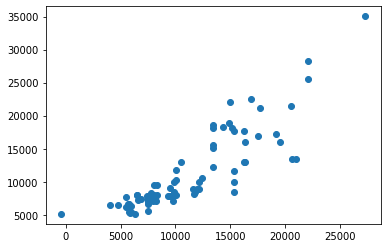

In [9]:
import matplotlib.pyplot as plt
plt.scatter(model.predict(x_test),y_test.values,marker='o')

In [13]:
y_2=auto2[['price']]
x_2=auto2[['wheel-base','horsepower']]
x1=auto2[['wheel-base']]
x2=auto2[['horsepower']]
x_2train,x_2test,y_2train,y_2test = train_test_split(x_2,y_2,test_size=0.5,random_state=0)

In [15]:
model2 = LinearRegression()
model2.fit(x_2test,y_2test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
model2.score(x_2test,y_2test)

0.6876608477424088

In [19]:
model2.coef_

array([[449.99160256, 112.21816681]])

In [21]:
model2.intercept_

array([-43469.4230362])

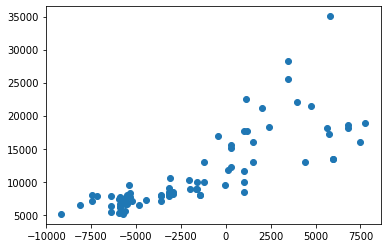

In [17]:
plt.scatter(model.predict(x_2test),y_2test.values,marker='o')

In [ ]:
#考察　相関は弱まった。